# 1.Introdução

O presente estudo busca analisar os clientes de um banco que são mais propícios a se tornarem inadimplentes através dos dados de crédito desses clientes. Buscamos entender o que torna um cliente inadimplente baseado em variáveis como escolaridade, salário anual, quantidade e valor das transações.

#2.Importando os pacotes

Primeiramente vamos  importar os pacotes necessários para realizar o projeto. Vamos utilizar os seguintes pacotes:

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 3.Lendos os dados

Vamos ler o arquivo csv através da url com o pandas e apresentar as primeiras 10 linhas do conjunto de dados:

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


É possível observar as colunas do conjunto de dados. Onde *default* = 0 representa os clientes adimplentes e o *default* = 1 repesenta os clientes inadimplentes.

# 4.Conhecendo a estrutura dos dados



## 4.1.Descobrindo a quantidade de linhas e colunas dos dados

Vamos usar a função *shape* para retornar a quantidade de linhas e colunas do conjunto de dados, respectivamente.

In [36]:
df.shape # retorna a quantidade de linhas e colunas totais, respectivamente.
df[df['default'] == 0].shape # retorna a quantidade de linhas e colunas dos clientes adimplentes.
df[df['default'] == 1].shape # retorna a quantidade de linhas e colunas dos clientes inadimplentes.

(1627, 16)

## 4.2.Calculando a proporção de clientes adimplentes e inadimplentes para melhor visualização.

Através dos valores obtidos anteriormente, podemos calcular a proporção, em porcentagem, de clientes adimplentes e inadimplentes.

In [37]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


Pode-se observar que a quantidade de clientes adimplentes é bem superior a quantidade de clientes inadimplentes.

## 4.3.Relacionando as colunas e estudando os seus respectivos tipos de dados.

Para listar o tipo de dados contidos em cada colunas, vamos utilizar o método *dtypes*.

In [38]:
df.dtypes #Colunas e seus respectivos tipos de dados.

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Utilizando o método *select_dtypes('object')*, podemos demonstrar os valores categóricos dos nossos dados.

In [39]:
df.select_dtypes('object').describe().transpose() #Atributos categóricos.

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Da mesma forma, podemos utilizar o método *select_dtypes('number')* para demonstrar os valores numéricos dos nossos dados.

In [40]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() #Atributos numéricos.

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Nota-se que os valores de limite de crédito e o valor de transações estão classificados como *object*, enquanto deveriam ser classificados como float.

## 4.4.Dados faltantes

Primeiramente, vamos verificar quais colunas possuem dados faltantes.

In [41]:
df.isna().any() #verificar quais colunas possuem dados faltantes.

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Em seguida, vamos analisar a quantidade e a porcentagem de dados faltantes em cada coluna.

In [42]:
def stats_dados_faltantes(df: pd.DataFrame) -> None: #estatisticas sobre as colunas dos dados faltantes.

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

Agora, vamos executar o codigo para todo o conjunto de dados, para o conjunto de dados dos clientes adimplentes e para o conjunto de dados dos clientes inadimplentes, respectivamente.

In [43]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [44]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [45]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


# 5.Fazendo a transformação e limpeza dos dados

Nesta etapa, vamos corrigir as colunas dos valores de limite de crédito e valor de transações que estavam sendo interpretadas como colunas categóricos. Além de remover as colunas que possuem os dados faltantes.



In [46]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [47]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função lambda para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional map.

In [48]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função lambda de limpeza pronta, basta aplicá-la nas colunas de interesse.

In [49]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Para finalizar, vamos descrever novamente o tipo de dados contidos em cada coluna.

In [50]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Repetindo para os dados categóricos e para os dados numéricos.

In [51]:
df.select_dtypes('object').describe().transpose() #Atributos categóricos.

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [52]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose() #Atributos numéricos.

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Podemos observar que a transformação foi realizada com sucesso.

#6.Removendo os dados faltantes

Vamos utilizar o método *dropna* para remover os dados faltantes.

In [53]:
df.dropna(inplace=True)

Em seguida, conferir se o problema foi solucionado através da estrutura dos dados.

In [54]:
df.shape

(7081, 16)

In [55]:
df[df['default'] == 0].shape

(5968, 16)

In [56]:
df[df['default'] == 1].shape

(1113, 16)

In [57]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [58]:
print(f"A proporcão clientes adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão clientes adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


É possível observar que o impacto da limpeza dos dados não alterou consideravelmente as proporções da quantidade de clientes avaliados. Logo, podemos prosseguir com a analise sem correr o risco do resultado ser afetado.

# 7.Visualização dos dados

Para a visualização dos dados, nós vamos comparar a base com todos os clientes com a base de adimplentes e inadimplentes. Utilizando esses dados prontos, avaliaremos o motivo pelo qual os clientes se tornaram inadimplentes.

Antes de começar, vamos usar o seaborn para selecionar um estilo para os nossos gráficos.

In [59]:
sns.set_style("whitegrid")

Em seguida, será separado os clientes adimplentes dos clientes inadimplentes:

In [60]:
df_adimplente = df[df['default'] == 0]

df_inadimplente = df[df['default'] == 1]

## 7.1.Visualizações categóricas:

Começando pelos dados categóricos, será apresentada a relação entre a variável resposta default com os atributos categóricos.

In [61]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Começando pela escolaridade:

C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\3968137541.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels = df_to_plot[coluna], rotation=90)
C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\3968137541.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels = df_to_plot[coluna], rotation=90)
C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\3968137541.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels = df_to_plot[coluna], rotation=90)
C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\3968137541.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


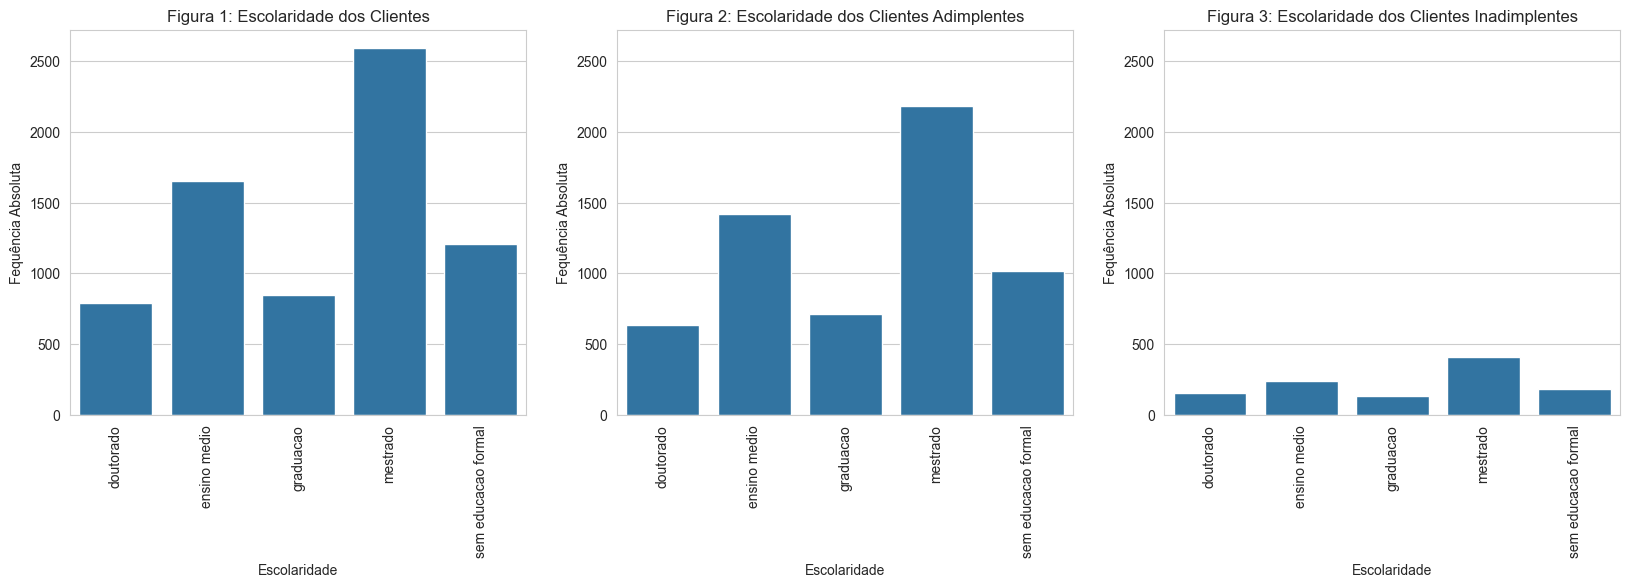

In [62]:
coluna = 'escolaridade'
titulos = ['Figura 1: Escolaridade dos Clientes', 'Figura 2: Escolaridade dos Clientes Adimplentes', 'Figura 3: Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns=[coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x = coluna, y='frequencia_absoluta', data = df_to_plot, ax = eixos[eixo])
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absoluta')
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Fequência Absoluta')
  f.set_xticklabels(labels = df_to_plot[coluna], rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim = (0, max_y))

  eixo += 1

figura.show()

Repetindo o mesmo processo para o salário Anual:

C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\3433656417.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels = df_to_plot[coluna], rotation=90)
C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\3433656417.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels = df_to_plot[coluna], rotation=90)
C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\3433656417.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels = df_to_plot[coluna], rotation=90)
C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\3433656417.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


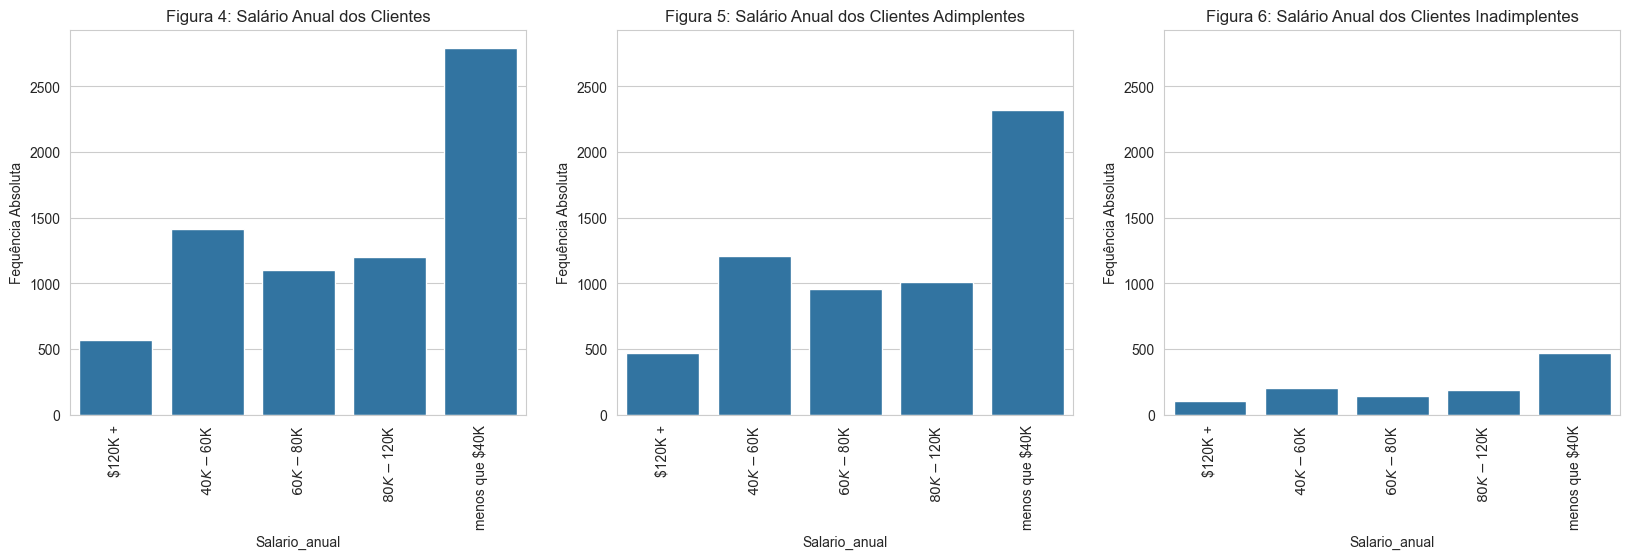

In [63]:
coluna = 'salario_anual'
titulos = ['Figura 4: Salário Anual dos Clientes', 'Figura 5: Salário Anual dos Clientes Adimplentes', 'Figura 6: Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns=[coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x = coluna, y='frequencia_absoluta', data = df_to_plot, ax = eixos[eixo])
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Frequência Absoluta')
  f.set(title = titulos[eixo], xlabel = coluna.capitalize(), ylabel = 'Fequência Absoluta')
  f.set_xticklabels(labels = df_to_plot[coluna], rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim = (0, max_y))

  eixo += 1

figura.show()

## 7.2.Visualizações numéricas

Agora será apresentada a relação entre a variável resposta default com os atributos numéricos.

In [64]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


A primeira a ser visualizada será a quantidade de transações realizadas pelos clientes nos últimos 12 meses.

C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\2887878907.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


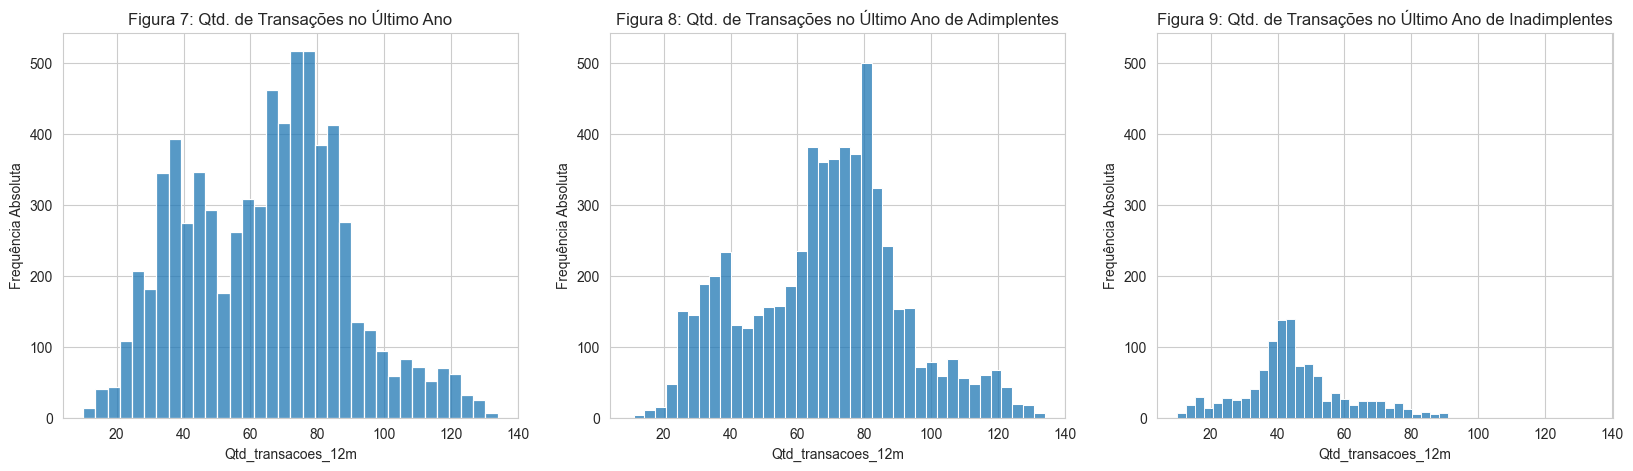

In [65]:
coluna = 'qtd_transacoes_12m'
titulos = ['Figura 7: Qtd. de Transações no Último Ano', 'Figura 8: Qtd. de Transações no Último Ano de Adimplentes', 'Figura 9: Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Agora será visualizado o valor das transações realizadas pelos clientes nos últimos 12 meses.

C:\Users\gusta\AppData\Local\Temp\ipykernel_23676\2693036823.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


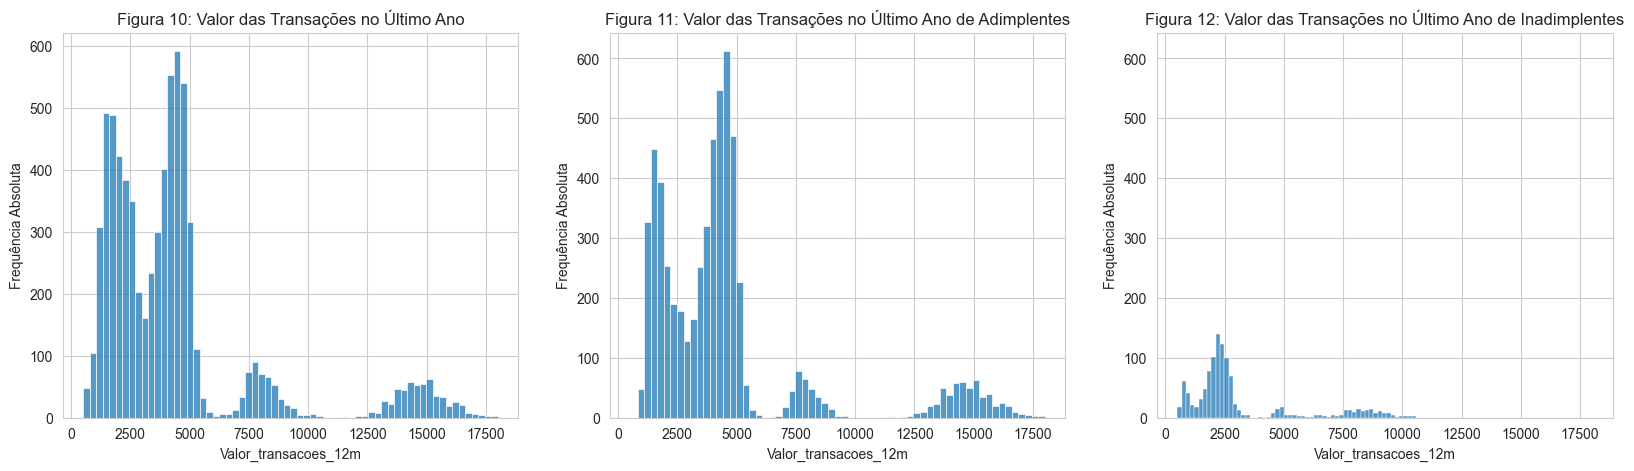

In [66]:
coluna = 'valor_transacoes_12m'
titulos = ['Figura 10: Valor das Transações no Último Ano', 'Figura 11: Valor das Transações no Último Ano de Adimplentes', 'Figura 12: Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Criaremos um gráfico do Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses para a melhor visualização dos dados:

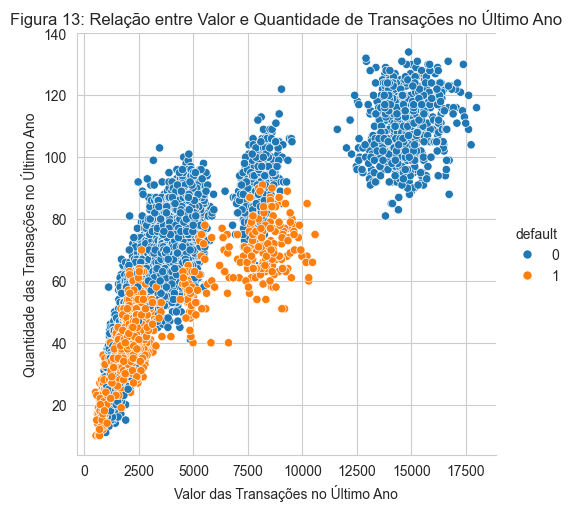

In [67]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Figura 13: Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

# 8.Discussão e Conclusão

### 8.1. Dados categóricos

### 8.1.1. Grau de Escolaridade

* Os gráficos das figuras 1, 2 e 3 correspondem ao grau de escolaridade dos clientes do banco.
* Grande parte desses clientes possuem um grau de ensino superior, sendo o maior grupo o de clientes com mestrado, seguido pelos que possuem doutorado.
* Pode-se destacar também o grande número de clientes que não possuem escolaridade alguma.
* Em todos os gráficos o padrão de comportamento são semelhantes, não possuindo grandes variações entre si. Podendo ser destacada apenas uma alteração no gráfico dos inadimplentes, onde a frequência de clientes que possuem doutorado superam os que possuem graduação.
* A ausência de discrepância dos gráficos demonstra que o grau de escolaridade não indica que o cliente pode se tornar inadimplente.





###8.1.2. Salário Anual

* Os gráficos das figuras 4, 5 e 6 correspondem ao salário anual dos clientes do banco.
* Podemos observar que a grande maioria ganham menos de 40k, sendo seguido pelos clientes com salários entre 40k e 60k.
* O comportamento dos gráficos não é alterado quando comparamos os três gráficos. Em todos o mesmo padrão é observado.
* Com isso, é possível comprovar que o salário anual não possui relação com a inadimplência dos clientes.

### 8.2. Dados numéricos

###8.2.1. Quantidade de transações realizadas pelos clientes nos últimos 12 meses

*   A quantidade de transações se concentra entre 60 e 80 anualmente, além de uma grande quantidade próxima de 40 transações no gráfico total.
* No gráfico de adimplentes, os valores estão concentrados entre 60 e 80 transações, assim como no grafico total.
* Já no gráfico de inadimplentes, os valores estão concentrados em 40 transações anuais. Representando um valor onde os clientes tendem a se tornar inadimplentes. Podendo ser um dos fatores que devem ser estudados para explicar a inadimplência dos clientes.

###8.2.2. Valor das transações realizadas pelos clientes nos últimos 12 meses



*  Os valores das transações estão concentrados entre 1000 e 5000 reais, contendo números relevantes entre 7500 e 10000 e entre 12500 e 17500.
* Quando analisamos os clientes adimplentes, podemos observar um comportamento muito parecido com o grafico geral.
* A diferença é visível em 2500 reais, onde o gráfico dos inadimplentes possui um gráfico bem concentrado nesse valor. Sendo uma variável relevante para o estudo na inadimplência dos clientes do banco.

###8.2.3. Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses


*  No grafico de relacionamento, relacionamos as duas variaveis de interesse em um mesmo grafico. Podemos ver uma concentração de clientes inadimplentes na faixa de 60 a 80 transações ao ano e no valor de 7500 a 10000. Há também um grupo maior ainda concentrado na media de 40 transações e com valores de 1000 a 5000 que também merecem uma atenção.

#9. Conclusão

*  Com os dados analisados podemos monitorar os clientes tanto que realizaram por volta de 40 transações ao ano, quanto os que realizam transações de valores proximos a 2500. Esses foram os principais pontos para que os clientes se tornassem inadimplentes. Com um controle maior sobre esses clientes, podemos evitar que eles se tornem inadimplentes para ajudar a reduzir esse problema no banco.